# X-ray Diffraction

In [1]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from iodp import utils, xrd



In [3]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("X-ray"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

Current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\X-ray\notebooks
New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\X-ray


## Reading XRD .png files

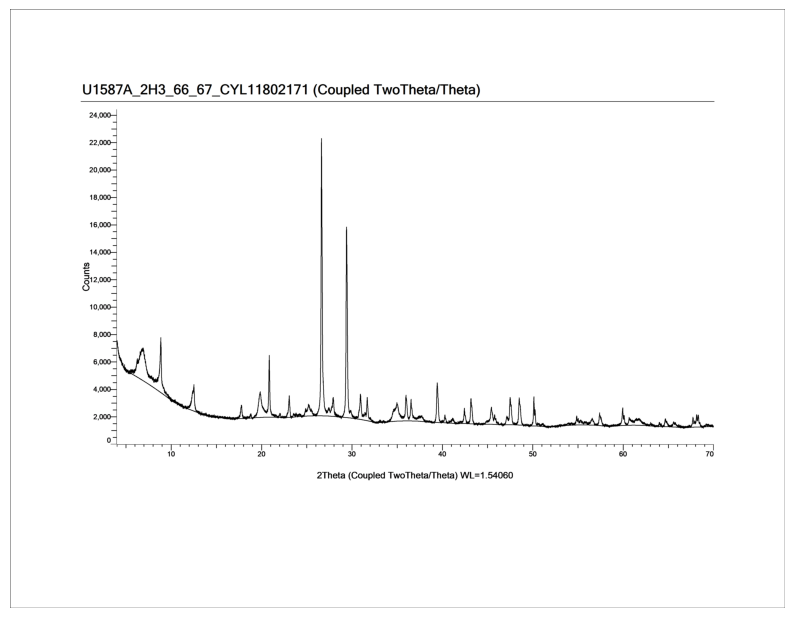

In [4]:
file = './data/input/XRD/U1587A_2H3_66_67_CYL11802171.png'

fig, ax = plt.subplots(1,1,figsize=(10,10))
img = plt.imread(file)
ax.imshow(img)
ax.axis('off')  # Hide axes for better visualization
plt.show()

## Reading XRD .uxd files

In [5]:
file = './data/input/XRD/U1587A_2H3_66_67_CYL11802171.uxd'
df = xrd.read_xrd_uxd_file(file)
df

,_FILEVERSION,_SAMPLE,_+SAMPLE,_SITE,_USER,_GONIOMETER_CODE,_STAGE_CODE,_GONIOMETER_RADIUS,_FIXED_DIVSLIT,_FIXED_SAMPLESLIT,...,_V4_DETECTORLLD2,_V4_DETECTORWW2,_V4_DETECTORPS,_V4_DETECTORDT,_V4_DETECTORPILEUPTIME,_V4_COUNTERS_MASK,_V4_DRIVES_MASK,_V4_ENCODERS_MASK,_COUNTS,spectrum
0,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,7381.000000
1,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,7565.000000
2,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,7380.000000
3,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,7393.000000
4,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,7494.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8001,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,1324.000000
8002,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,1246.000000
8003,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,1312.000000
8004,3,U1587A_2H3_66_67_CYL11802171,Bulk Samples,JOIDES Resolution,Heather Barnes and Kristin Bronk,22,0,200.5,0.6,1,...,0,0,9999,0,0,1,0,0,1,1288.000000


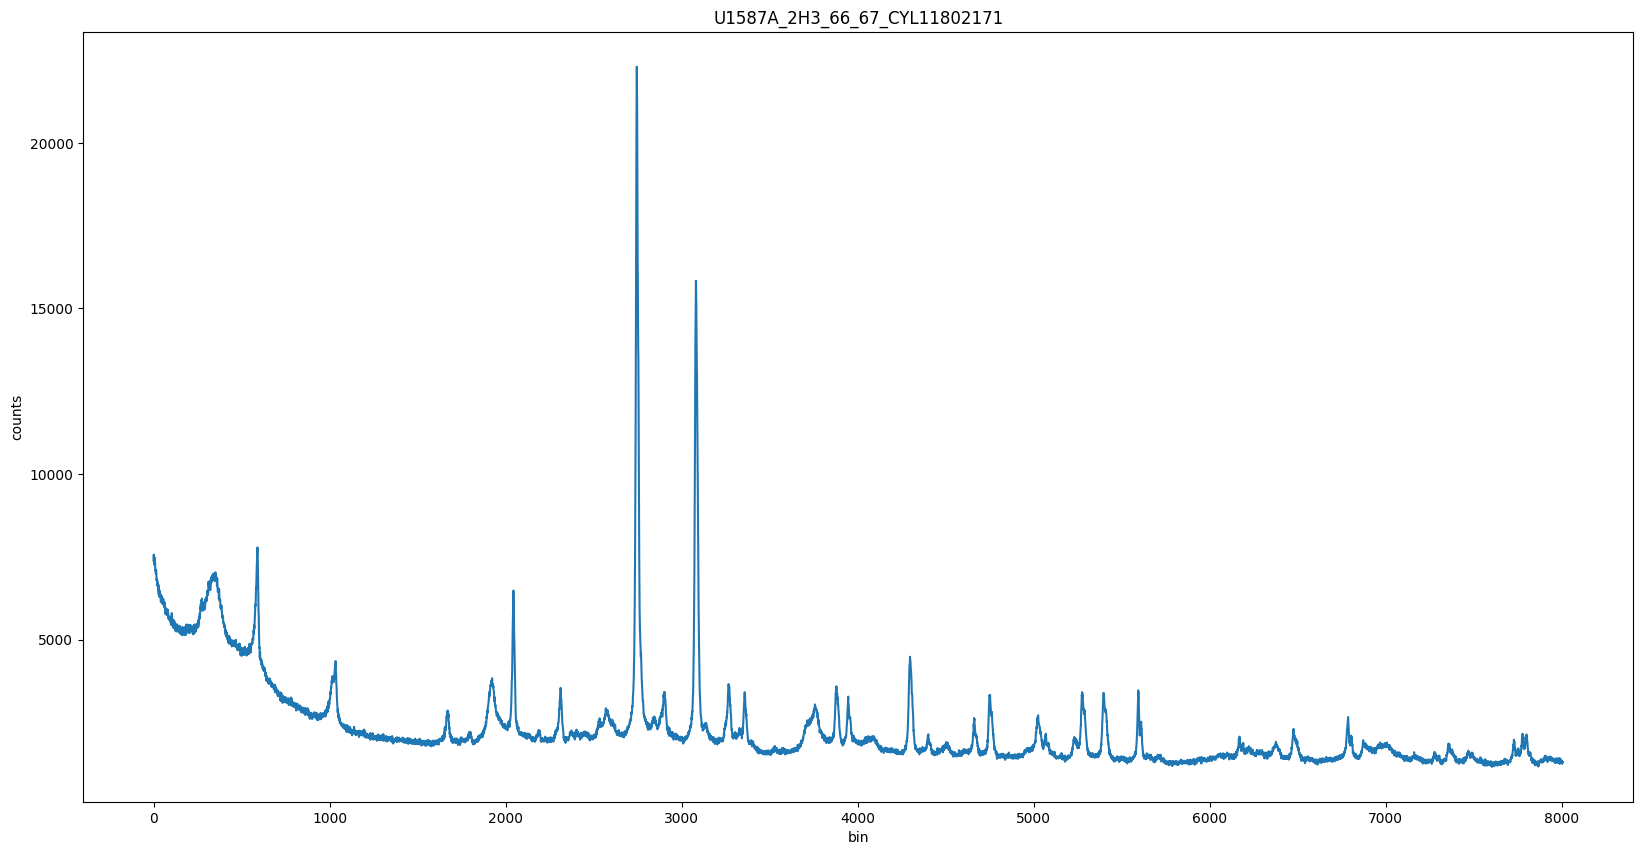

In [16]:
data = xrd.read_xrd_uxd_file(file,as_dataframe=False)

# NOTE: The x-axis is plotted as bin #. There is a conversion to get it into 2Theta form.
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.plot(np.array(data['spectrum']).astype(float))
ax.set_title(data['_V4_INF_SAMPLEID'])
ax.set_ylabel('counts')
ax.set_xlabel('bin')

plt.show()
